# Diabetes-Logistic Regression


In [3]:
#Importing libaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn .preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#looking for missing values:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.quantile(0.01)

Pregnancies                  0.00000
Glucose                     57.00000
BloodPressure                0.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                          0.00000
DiabetesPedigreeFunction     0.09468
Age                         21.00000
Outcome                      0.00000
Name: 0.01, dtype: float64

In [12]:
#CHECK FOR EVENT RATE:
data['Outcome'].mean()

0.3489583333333333

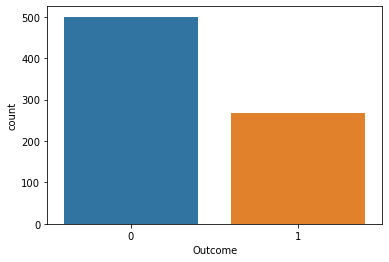

In [13]:
#Visualize the event and non event graph
sns.countplot(x='Outcome',data=data)
plt.show()

In [15]:
#unique value each input feature:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [16]:
#applying groupby operation on pregnancies:
data.groupby('Pregnancies')['Outcome'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

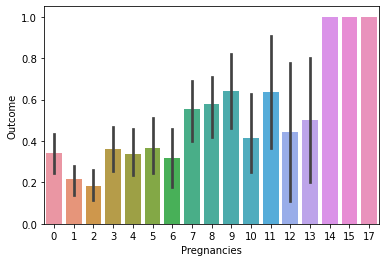

In [17]:
#visualizing the above code as:
from numpy import mean
ax=sns.barplot(x='Pregnancies',y='Outcome',data=data,estimator=mean)

# Feature Selection

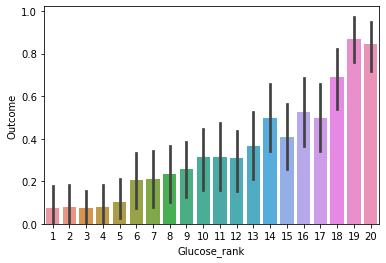

In [19]:
#create buckets or ranks of variables and then across each bucket/rank we study the probability of occurence
data['Glucose_rank']=pd.qcut(data['Glucose'].rank(method='first').values,20,duplicates='drop').codes+1
from numpy import mean
ax=sns.barplot(x='Glucose_rank',y='Outcome',data=data,estimator=mean)
#This abov eimplementation is done is using rank and plots





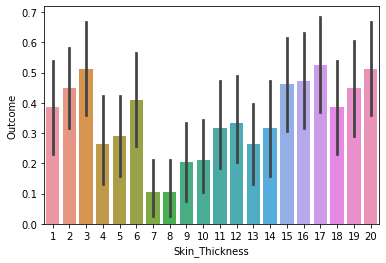

In [25]:
data['Skin_Thickness']=pd.qcut(data['SkinThickness'].rank(method='first').values,20,duplicates='drop').codes+1
from numpy import mean
ax=sns.barplot(x='Skin_Thickness',y='Outcome',data=data,estimator=mean)

In [22]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_rank'],
      dtype='object')

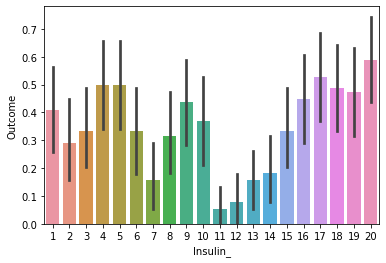

In [28]:
data['Insulin_']=pd.qcut(data['Insulin'].rank(method='first').values,20,duplicates='drop').codes+1
from numpy import mean
ax=sns.barplot(x='Insulin_',y='Outcome',data=data,estimator=mean)

In [ ]:
x=['Pregnancies','Glucose','BMI','Insulin','DiabetesPedigreeFunction','Age']

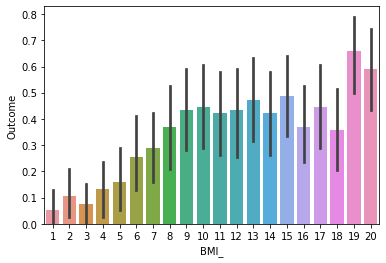

In [29]:
data['BMI_']=pd.qcut(data['BMI'].rank(method='first').values,20,duplicates='drop').codes+1
from numpy import mean
ax=sns.barplot(x='BMI_',y='Outcome',data=data,estimator=mean)

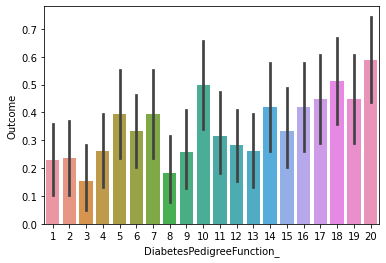

In [31]:
data['DiabetesPedigreeFunction_']=pd.qcut(data['DiabetesPedigreeFunction'].rank(method='first').values,20,duplicates='drop').codes+1
from numpy import mean
ax=sns.barplot(x='DiabetesPedigreeFunction_',y='Outcome',data=data,estimator=mean)


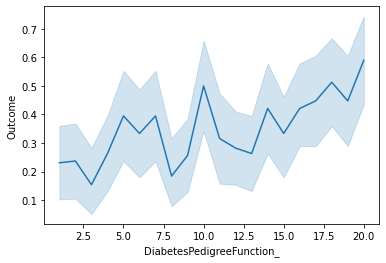

In [32]:
ax=sns.lineplot(x='DiabetesPedigreeFunction_',y='Outcome',data=data,estimator=mean)

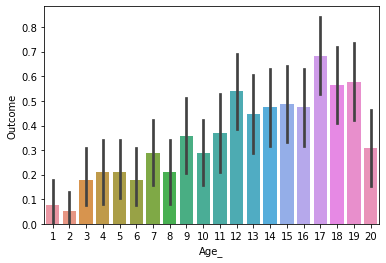

In [33]:
data['Age_']=pd.qcut(data['Age'].rank(method='first').values,20,duplicates='drop').codes+1
from numpy import mean
ax=sns.barplot(x='Age_',y='Outcome',data=data,estimator=mean)

In [36]:
x=data[['Pregnancies','Glucose','BMI','Insulin','DiabetesPedigreeFunction','Age']].values
y=data[['Outcome']].values


In [45]:
# Train-test split:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)
Y_test.shape

(231, 1)

In [48]:
#Logistic Regression model:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
#fit the modelwith the data:
logreg.fit(X_train,Y_train)

/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [51]:
#Predictions:
y_pred=logreg.predict(X_test)
print(logreg.score(X_test,Y_test))

0.7748917748917749


In [54]:
#accuracy
accuracy=print(metrics.accuracy_score(Y_test,y_pred))

0.7748917748917749


# Performance matrix:

In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85       157
           1       0.71      0.50      0.59        74

    accuracy                           0.77       231
   macro avg       0.75      0.70      0.72       231
weighted avg       0.77      0.77      0.76       231



In [57]:
y_pred=logreg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [58]:
y_predict=logreg.predict_proba(X_test)
y_predict

array([[0.05580126, 0.94419874],
       [0.83683428, 0.16316572],
       [0.90157775, 0.09842225],
       [0.37777223, 0.62222777],
       [0.88214337, 0.11785663],
       [0.96061581, 0.03938419],
       [0.27785102, 0.72214898],
       [0.15156775, 0.84843225],
       [0.67565104, 0.32434896],
       [0.63052668, 0.36947332],
       [0.43601139, 0.56398861],
       [0.04404418, 0.95595582],
       [0.69705805, 0.30294195],
       [0.88050163, 0.11949837],
       [0.88657579, 0.11342421],
       [0.84570424, 0.15429576],
       [0.17092494, 0.82907506],
       [0.97573047, 0.02426953],
       [0.55070546, 0.44929454],
       [0.79993595, 0.20006405],
       [0.33462978, 0.66537022],
       [0.55114105, 0.44885895],
       [0.90293849, 0.09706151],
       [0.92208187, 0.07791813],
       [0.95057795, 0.04942205],
       [0.69837907, 0.30162093],
       [0.94647523, 0.05352477],
       [0.09845723, 0.90154277],
       [0.88883023, 0.11116977],
       [0.85498751, 0.14501249],
       [0.